In [4]:
import pandas as pd
main_df = pd.read_csv("data/processed/clean_dataset_experience2.csv")

--- Average Metrics by Follicle Group ---
                      Age       AMH  n_Follicles      E2_day5
Follicle_Group                                               
Low (<=18)      32.178571  1.463968     9.343860  1174.339023
Medium (19-24)  31.114943  3.012785    21.551724  1334.185385
High (>24)      30.811881  4.404000    32.207921  1072.401771


C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4201015743.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4201015743.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Follicle_Group', y='AMH', data=df, ax=axes[0, 0], palette="Blues")
C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4201015743.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fol

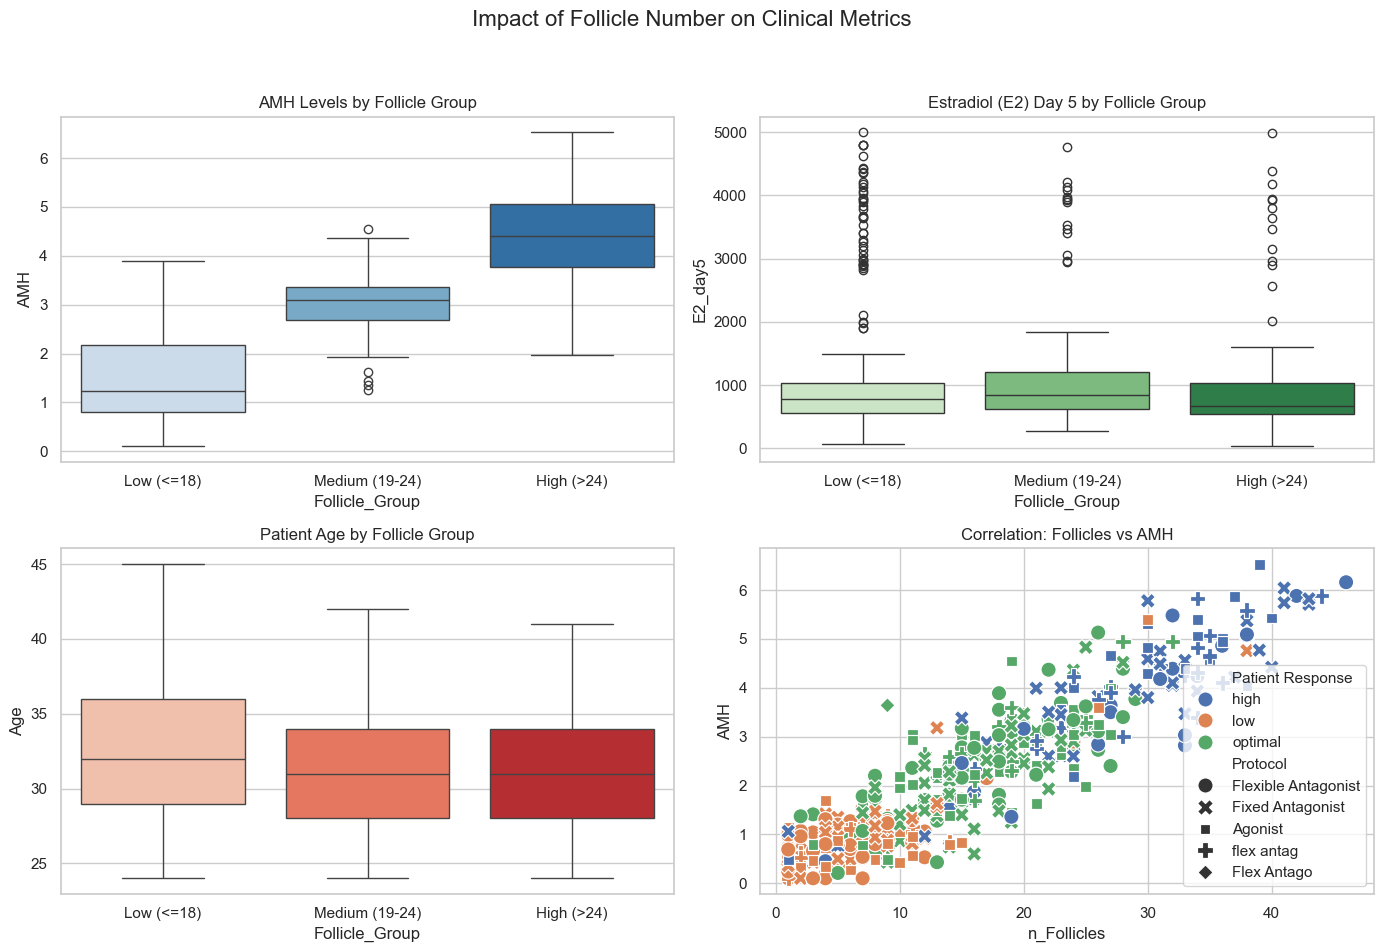

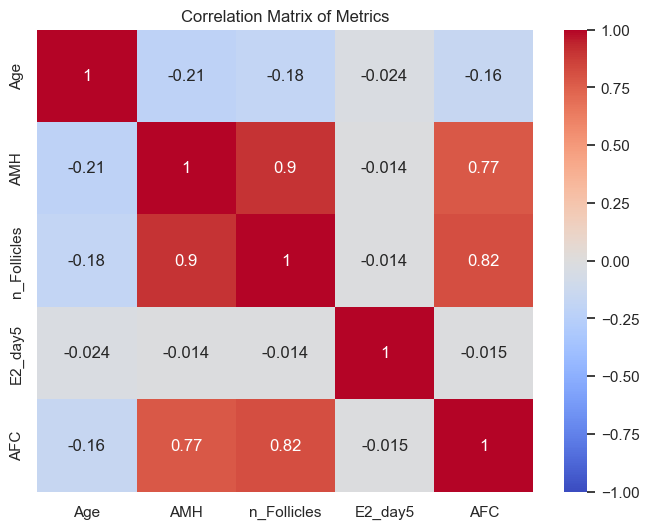

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data from CSV
# Replace 'your_data_file.csv' with the actual name of your file
file_path = 'data/raw/patients.csv' 
df = pd.read_csv(file_path)

# 2. Data Cleaning
# Standardize Protocol names to fix variations like "flex anta", "agoni", etc.
protocol_map = {
    'flexible antagonist': 'Flexible Antagonist',
    'flex anta': 'Flexible Antagonist',
    'fixed antagonist': 'Fixed Antagonist',
    'fixed anta': 'Fixed Antagonist',
    'fix antag': 'Fixed Antagonist',
    'agonist': 'Agonist',
    'agoni': 'Agonist'
}

# Apply the mapping if the 'Protocol' column exists
if 'Protocol' in df.columns:
    df['Protocol'] = df['Protocol'].astype(str).str.lower().map(protocol_map).fillna(df['Protocol'])
    # Note: The map above expects lowercase keys. 
    # If your CSV has clean names already, you might not need this.
    # A more robust way using replace for substrings or specific values:
    df['Protocol'] = df['Protocol'].replace(protocol_map)

# Fix typos in Response (e.g., "optima" -> "optimal")
if 'Patient Response' in df.columns:
    df['Patient Response'] = df['Patient Response'].replace({'optima': 'optimal'})

# Ensure numeric columns are actually numeric (coercing errors to NaN)
numeric_cols = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Create Groups based on n_Follicles
# We define 3 groups: Low (<=18), Medium (19-24), High (>24)
# You can adjust the bins=[0, 18, 24, 100] to change the cut-off points.
if 'n_Follicles' in df.columns:
    df['Follicle_Group'] = pd.cut(
        df['n_Follicles'], 
        bins=[0, 18, 24, 1000], 
        labels=['Low (<=18)', 'Medium (19-24)', 'High (>24)']
    )

    # Print Summary
    print("--- Average Metrics by Follicle Group ---")
    summary = df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
    print(summary)
else:
    print("Error: 'n_Follicles' column not found in CSV.")

# 4. Generate Plots
# We check if required columns exist before plotting to avoid errors
required_cols = ['AMH', 'E2_day5', 'Age', 'n_Follicles', 'Follicle_Group']
if all(col in df.columns for col in required_cols):
    
    # Set plot style
    sns.set(style="whitegrid")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Impact of Follicle Number on Clinical Metrics', fontsize=16)

    # Plot A: Boxplot of AMH
    sns.boxplot(x='Follicle_Group', y='AMH', data=df, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title('AMH Levels by Follicle Group')

    # Plot B: Boxplot of E2
    sns.boxplot(x='Follicle_Group', y='E2_day5', data=df, ax=axes[0, 1], palette="Greens")
    axes[0, 1].set_title('Estradiol (E2) Day 5 by Follicle Group')

    # Plot C: Boxplot of Age
    sns.boxplot(x='Follicle_Group', y='Age', data=df, ax=axes[1, 0], palette="Reds")
    axes[1, 0].set_title('Patient Age by Follicle Group')

    # Plot D: Scatter Plot (Follicles vs AMH)
    # We map 'Protocol' to shapes and 'Patient Response' to colors if they exist
    hue_col = 'Patient Response' if 'Patient Response' in df.columns else None
    style_col = 'Protocol' if 'Protocol' in df.columns else None
    
    sns.scatterplot(
        x='n_Follicles', 
        y='AMH', 
        hue=hue_col, 
        style=style_col, 
        s=120, 
        data=df, 
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Correlation: Follicles vs AMH')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 5. Correlation Matrix
    plt.figure(figsize=(8, 6))
    # Select only the numeric columns present in the dataframe
    valid_numeric_cols = [c for c in numeric_cols if c in df.columns]
    corr = df[valid_numeric_cols].corr()
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Metrics')
    plt.show()

else:
    print("Some required columns for plotting are missing.")

In [13]:
def analyze_dataframe(df, name):
    """Prints comprehensive information for a given DataFrame."""
    print(f"## 📊 Analysis for DataFrame: **{name}**")
    print("-" * 50)

    # --- 1. General Information (Infos) ---
    print("\n### ℹ️ General Info")
    df.info(verbose=False, memory_usage="deep")

    # --- 2. Descriptive Statistics (Description) ---
    print("\n### 📈 Descriptive Statistics")
    print(df.describe(include='all').to_markdown(numalign="left", stralign="left"))

    # --- 3. Missing/Null Values ---
    print("\n### 🚫 Missing Values (Nulls)")
    null_counts = df.isnull().sum()
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    null_df = pd.DataFrame({
        'Null Count': null_counts,
        'Percentage': null_percentages.astype(str) + '%'
    }).sort_values(by='Null Count', ascending=False)

    print(null_df[null_df['Null Count'] > 0].to_markdown(numalign="left", stralign="left"))

    # --- 4. fully Duplicated rows---
    print("\n### 👯 Duplicate Rows")
    total_duplicates = df.duplicated().sum()
    print(f"Total fully duplicated rows found: **{total_duplicates}**")

    if total_duplicates > 0:
        print("\nNote: Consider using `df.drop_duplicates(inplace=True)` to remove them.")

    print("\n" + "=" * 50 + "\n")

In [14]:
analyze_dataframe(main_df, "Main DataFrame")

## 📊 Analysis for DataFrame: **Main DataFrame**
--------------------------------------------------

### ℹ️ General Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 10 entries, patient_id to Follicle_Group
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 110.2 KB

### 📈 Descriptive Statistics
|        | patient_id   | cycle_number   | Age     | Protocol         | AMH     | n_Follicles   | E2_day5   | AFC     | Patient Response   | Follicle_Group   |
|:-------|:-------------|:---------------|:--------|:-----------------|:--------|:--------------|:----------|:--------|:-------------------|:-----------------|
| count  | 506          | 506            | 500     | 506              | 452     | 473           | 472       | 262     | 506                | 473              |
| unique | 446          | nan            | nan     | 5                | nan     | nan           | nan       | nan     | 3                  | 3                |
| top    | A

In [11]:
file_path = 'data/raw/patients.csv' 
df = pd.read_csv(file_path)

In [15]:
print(analyze_dataframe(df, "Main DataFrame"))

## 📊 Analysis for DataFrame: **Main DataFrame**
--------------------------------------------------

### ℹ️ General Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 9 entries, patient_id to Patient Response
dtypes: float64(5), int64(1), object(3)
memory usage: 107.8 KB

### 📈 Descriptive Statistics
|        | patient_id   | cycle_number   | Age     | Protocol   | AMH     | n_Follicles   | E2_day5   | AFC     | Patient Response   |
|:-------|:-------------|:---------------|:--------|:-----------|:--------|:--------------|:----------|:--------|:-------------------|
| count  | 506          | 506            | 500     | 506        | 452     | 473           | 472       | 262     | 506                |
| unique | 446          | nan            | nan     | 9          | nan     | nan           | nan       | nan     | 3                  |
| top    | Amira L      | nan            | nan     | flex anta  | nan     | nan           | nan       | nan     | optimal   

--- Average Metrics by Follicle Group ---
                      Age       AMH  n_Follicles      E2_day5
Follicle_Group                                               
Low (<=18)      32.178571  1.463968     9.343860  1174.339023
Medium (19-24)  31.114943  3.012785    21.551724  1334.185385
High (>24)      30.811881  4.404000    32.207921  1072.401771


C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4279402746.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = main_df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4279402746.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Follicle_Group', y='AMH', data=main_df, ax=axes[0, 0], palette="Blues")
C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4279402746.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxp

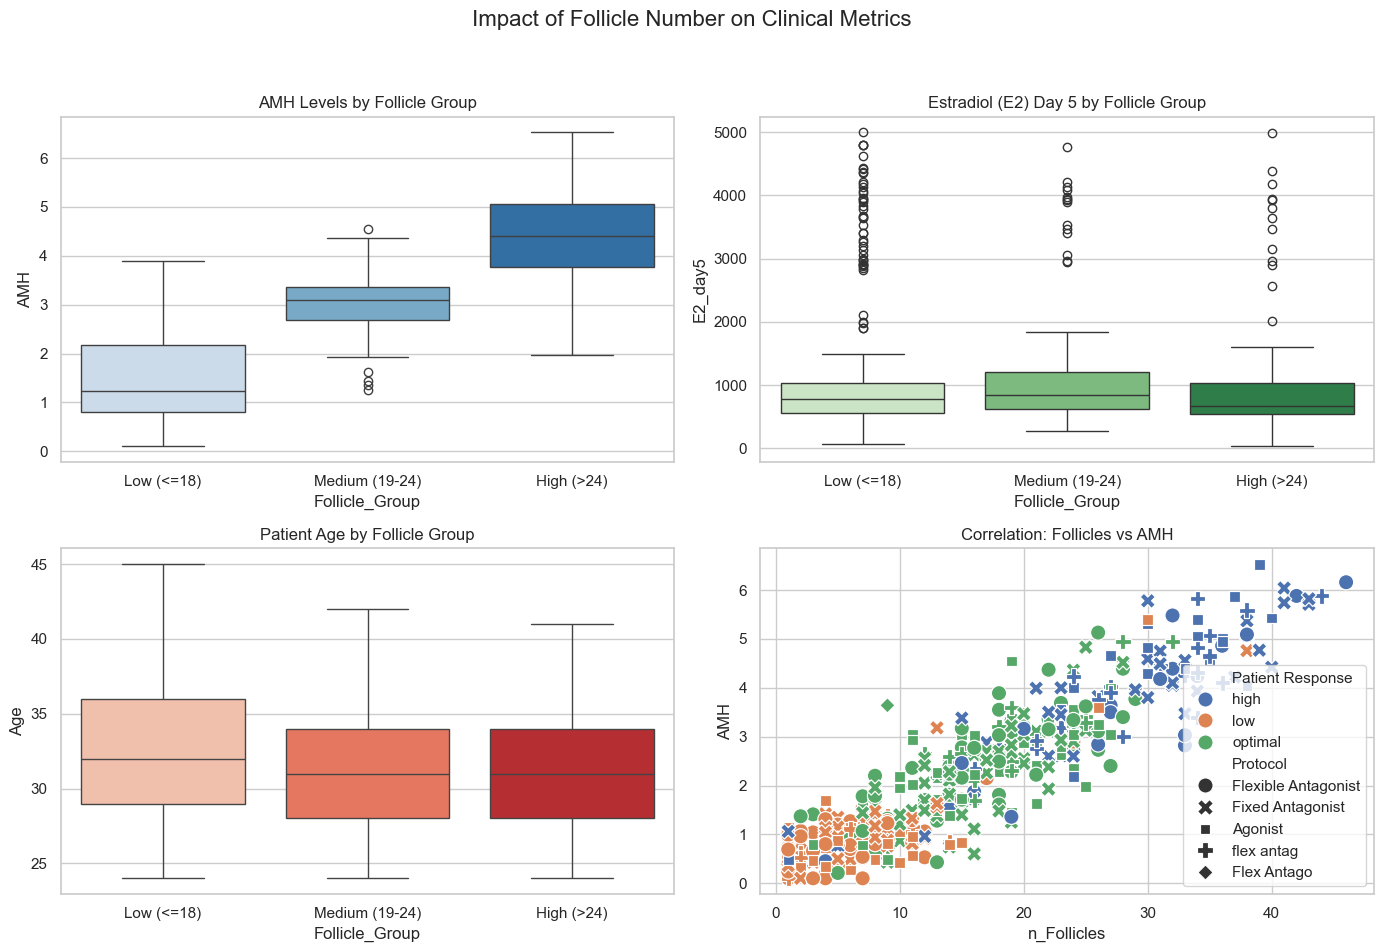

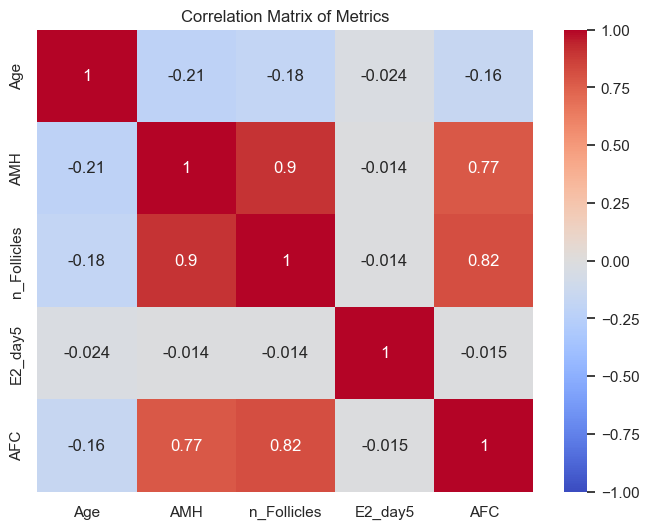

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Data Cleaning
# Standardize Protocol names to fix variations like "flex anta", "agoni", etc.
protocol_map = {
    'flexible antagonist': 'Flexible Antagonist',
    'flex anta': 'Flexible Antagonist',
    'fixed antagonist': 'Fixed Antagonist',
    'fixed anta': 'Fixed Antagonist',
    'fix antag': 'Fixed Antagonist',
    'agonist': 'Agonist',
    'agoni': 'Agonist'
}

# Apply the mapping if the 'Protocol' column exists
if 'Protocol' in main_df.columns:
    main_df['Protocol'] = main_df['Protocol'].astype(str).str.lower().map(protocol_map).fillna(main_df['Protocol'])
    # Note: The map above expects lowercase keys. 
    # If your CSV has clean names already, you might not need this.
    # A more robust way using replace for substrings or specific values:
    main_df['Protocol'] = main_df['Protocol'].replace(protocol_map)

# Fix typos in Response (e.g., "optima" -> "optimal")
if 'Patient Response' in main_df.columns:
    main_df['Patient Response'] = main_df['Patient Response'].replace({'optima': 'optimal'})

# Ensure numeric columns are actually numeric (coercing errors to NaN)
numeric_cols = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC']
for col in numeric_cols:
    if col in main_df.columns:
        main_df[col] = pd.to_numeric(main_df[col], errors='coerce')

# 3. Create Groups based on n_Follicles
# We define 3 groups: Low (<=18), Medium (19-24), High (>24)
# You can adjust the bins=[0, 18, 24, 100] to change the cut-off points.
if 'n_Follicles' in main_df.columns:
    main_df['Follicle_Group'] = pd.cut(
        main_df['n_Follicles'], 
        bins=[0, 18, 24, 1000], 
        labels=['Low (<=18)', 'Medium (19-24)', 'High (>24)']
    )

    # Print Summary
    print("--- Average Metrics by Follicle Group ---")
    summary = main_df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
    print(summary)
else:
    print("Error: 'n_Follicles' column not found in CSV.")

# 4. Generate Plots
# We check if required columns exist before plotting to avoid errors
required_cols = ['AMH', 'E2_day5', 'Age', 'n_Follicles', 'Follicle_Group']
if all(col in main_df.columns for col in required_cols):
    
    # Set plot style
    sns.set(style="whitegrid")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Impact of Follicle Number on Clinical Metrics', fontsize=16)

    # Plot A: Boxplot of AMH
    sns.boxplot(x='Follicle_Group', y='AMH', data=main_df, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title('AMH Levels by Follicle Group')

    # Plot B: Boxplot of E2
    sns.boxplot(x='Follicle_Group', y='E2_day5', data=main_df, ax=axes[0, 1], palette="Greens")
    axes[0, 1].set_title('Estradiol (E2) Day 5 by Follicle Group')

    # Plot C: Boxplot of Age
    sns.boxplot(x='Follicle_Group', y='Age', data=main_df, ax=axes[1, 0], palette="Reds")
    axes[1, 0].set_title('Patient Age by Follicle Group')

    # Plot D: Scatter Plot (Follicles vs AMH)
    # We map 'Protocol' to shapes and 'Patient Response' to colors if they exist
    hue_col = 'Patient Response' if 'Patient Response' in main_df.columns else None
    style_col = 'Protocol' if 'Protocol' in main_df.columns else None
    
    sns.scatterplot(
        x='n_Follicles', 
        y='AMH', 
        hue=hue_col, 
        style=style_col, 
        s=120, 
        data=main_df, 
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Correlation: Follicles vs AMH')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 5. Correlation Matrix
    plt.figure(figsize=(8, 6))
    # Select only the numeric columns present in the dataframe
    valid_numeric_cols = [c for c in numeric_cols if c in main_df.columns]
    corr = main_df[valid_numeric_cols].corr()
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Metrics')
    plt.show()

else:
    print("Some required columns for plotting are missing.")

In [22]:
main_df[main_df['Age'].isna()]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,Follicle_Group
41,Lamia B,1,NaN,Agonist,3.04,11.0,573.81,16.0,optimal,Low (<=18)
98,Nadine C,1,NaN,Flexible Antagonist,1.08,11.0,3679.00,4.0,low,Low (<=18)
273,Aya K,1,NaN,Flexible Antagonist,4.73,NaN,317.82,16.0,high,NaN
281,Gabriella F,1,NaN,Agonist,NaN,1.0,1238.96,4.0,low,Low (<=18)
374,Deema O,1,NaN,Fixed Antagonist,1.14,4.0,204.00,6.0,low,Low (<=18)
447,Amal Y,1,NaN,Agonist,1.71,13.0,981.48,9.0,optimal,Low (<=18)


In [25]:
import pandas as pd
main_df = pd.read_csv("data/processed/clean_dataset_experience2.csv")

In [26]:
main_df[main_df['Age'].isna()]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response


In [38]:
print("Number of rows with missing AFC:", len(main_df[main_df['AFC'].isna()]))


Number of rows with missing AFC: 241


In [46]:
import pandas as pd

# Define age bins
bins = [24, 34, 40, 46]  # intervals: 25-34, 35-40, 41-46
labels = ['25-34', '35-40', '41-46']

# Create a new column for age groups
main_df['Age_group'] = pd.cut(main_df['Age'], bins=bins, labels=labels)

# Calculate median AFC per age group
afc_median_by_age = main_df.groupby('Age_group')['AFC'].median()

print(afc_median_by_age)


Age_group
25-34    12.0
35-40     9.0
41-46     9.0
Name: AFC, dtype: float64


C:\Users\maata\AppData\Local\Temp\ipykernel_21252\2998546137.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  afc_median_by_age = main_df.groupby('Age_group')['AFC'].median()


In [48]:
import pandas as pd

# Define age bins
bins = [24, 34, 40, 46]  # intervals: 25-34, 35-40, 41-46
labels = ['25-34', '35-40', '41-46']

# Create a new column for age groups
main_df['Age_group'] = pd.cut(main_df['Age'], bins=bins, labels=labels)

# Calculate median AFC per age group
afc_median_by_age = main_df.groupby('Age_group')['E2_day5'].mean()

print(afc_median_by_age)

Age_group
25-34    1239.384104
35-40    1017.813796
41-46    1766.936500
Name: E2_day5, dtype: float64


C:\Users\maata\AppData\Local\Temp\ipykernel_21252\686702717.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  afc_median_by_age = main_df.groupby('Age_group')['E2_day5'].mean()


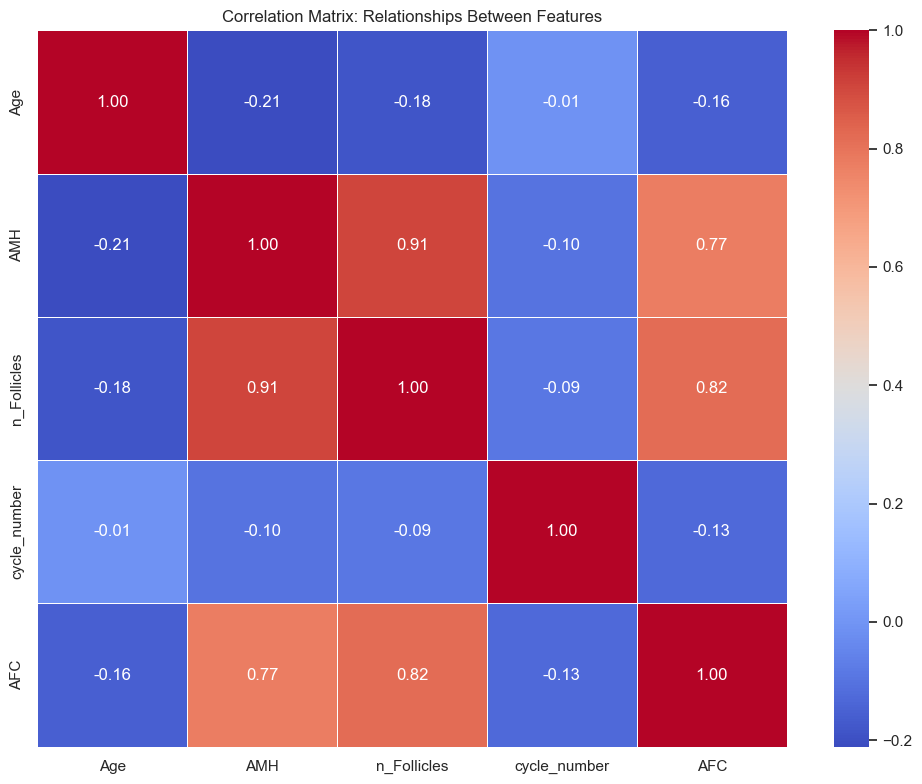

Generating Pairplot... this may take a moment.


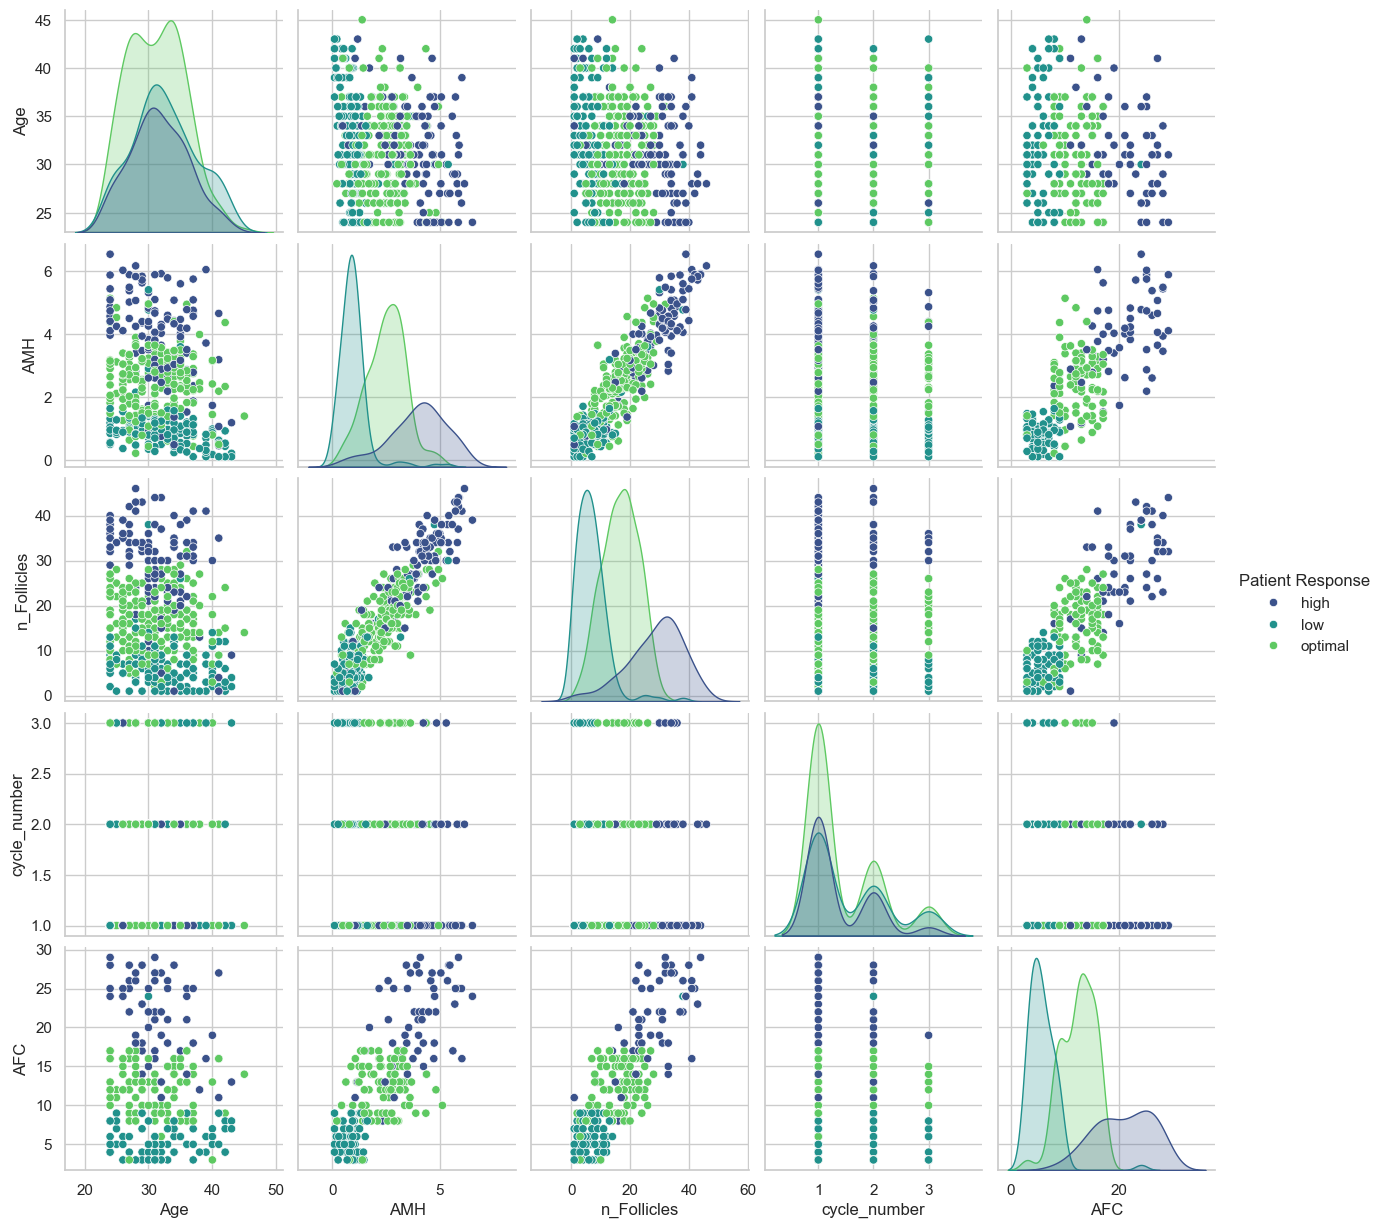

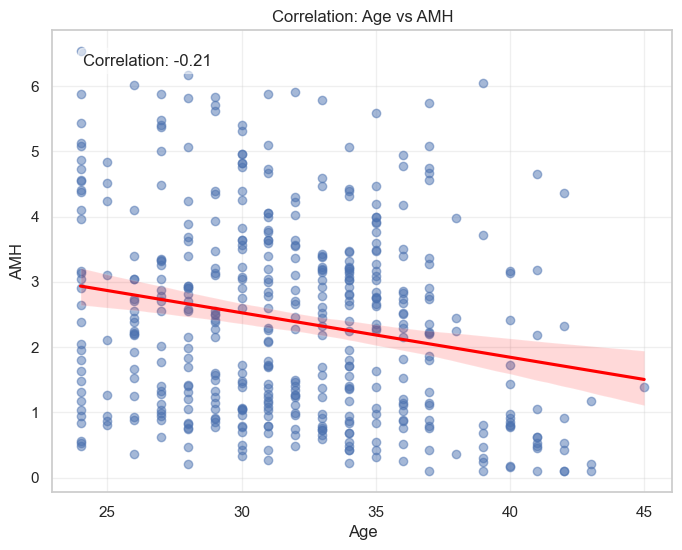

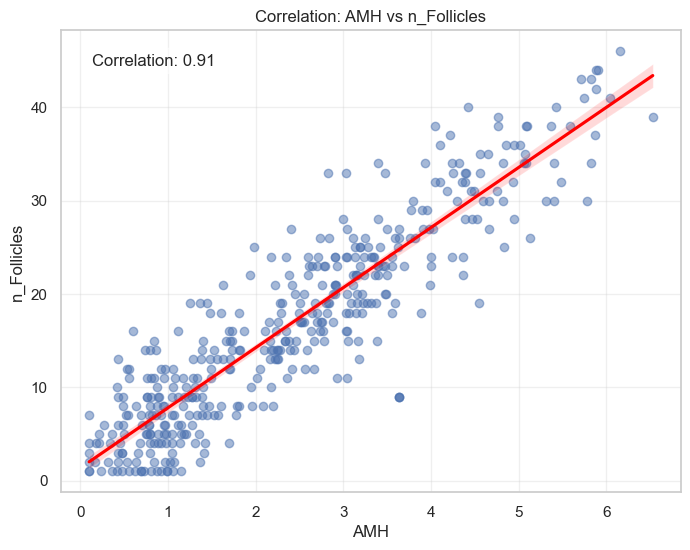

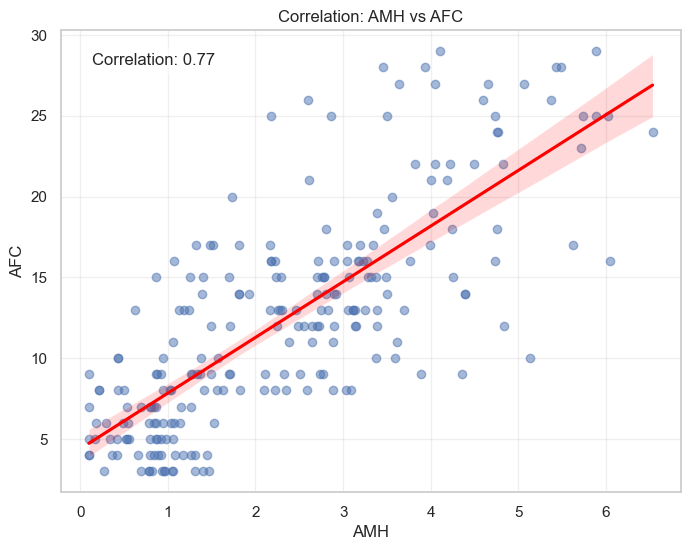

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
# Assuming you are running this from the project root
df = pd.read_csv("data/processed/clean_dataset_experience2.csv")

# 2. Impute Age with Median (As you mentioned you already did this)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Separate numerical columns for correlation analysis
# Note: We exclude 'patient_id' and 'Protocol' (categorical) for the heatmap
numerical_cols = ['Age', 'AMH', 'n_Follicles', 'E2', 'cycle_number', 'AFC']
# Ensure all exist in your dataframe (handle case sensitivity or missing columns)
numerical_cols = [c for c in numerical_cols if c in df.columns]

# --- PLOT 1: ALL TOGETHER (Correlation Heatmap) ---
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create Heatmap
# annot=True shows the numbers
# cmap='coolwarm' makes red=positive correlation, blue=negative
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Relationships Between Features")
plt.tight_layout()
plt.show()

# --- PLOT 2: ALL TOGETHER (Pairplot) ---
# This plots every numerical variable against every other one
# hue='Patient Response' colors the dots by the outcome (Low/Optimal/High)
print("Generating Pairplot... this may take a moment.")
sns.pairplot(df, vars=numerical_cols, hue='Patient Response', diag_kind='kde', palette='viridis')
plt.show()

# --- PLOT 3: "EACH 2" (Key Bivariate Relations) ---
# These are the most medically significant pairs to check for imputation logic

# Function to plot regression relationships
def plot_relation(x_col, y_col, df):
    if x_col not in df.columns or y_col not in df.columns:
        return
        
    plt.figure(figsize=(8, 6))
    # regplot draws a scatter plot AND a regression line (best fit)
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Correlation: {x_col} vs {y_col}")
    
    # Calculate correlation just for these two
    corr = df[[x_col, y_col]].corr().iloc[0, 1]
    plt.text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.grid(True, alpha=0.3)
    plt.show()

# A. Age vs AMH (Usually Inverse Relation)
# If correlation is high negative (e.g., -0.7), you can use Age to fill missing AMH.
plot_relation('Age', 'AMH', df)

# B. AMH vs Follicles (Usually Strong Positive)
# If correlation is high positive (e.g., 0.8), you can use AMH to fill missing Follicles (and vice versa).
plot_relation('AMH', 'n_Follicles', df)

# C. Follicles vs E2 (Estradiol)
# E2 is produced by follicles, so they should be correlated.
plot_relation('n_Follicles', 'E2', df)

# D. AFC vs AMH (If AFC exists in your data)
# AFC is very similar to AMH biologically. Check this to see if you can drop AFC if AMH is present.
plot_relation('AMH', 'AFC', df)

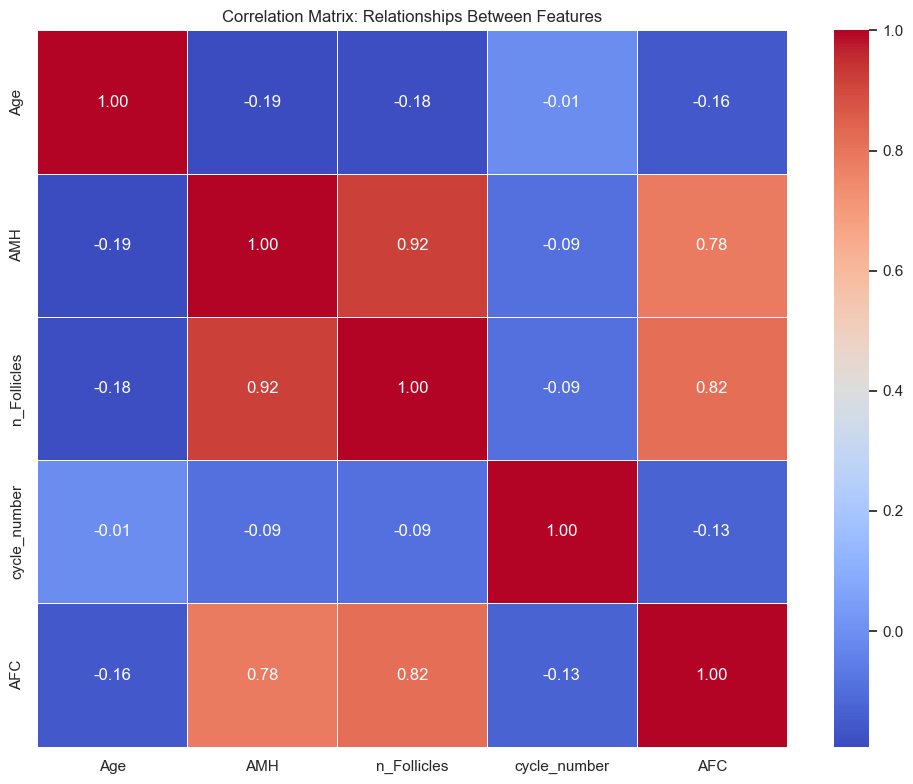

Generating Pairplot... this may take a moment.


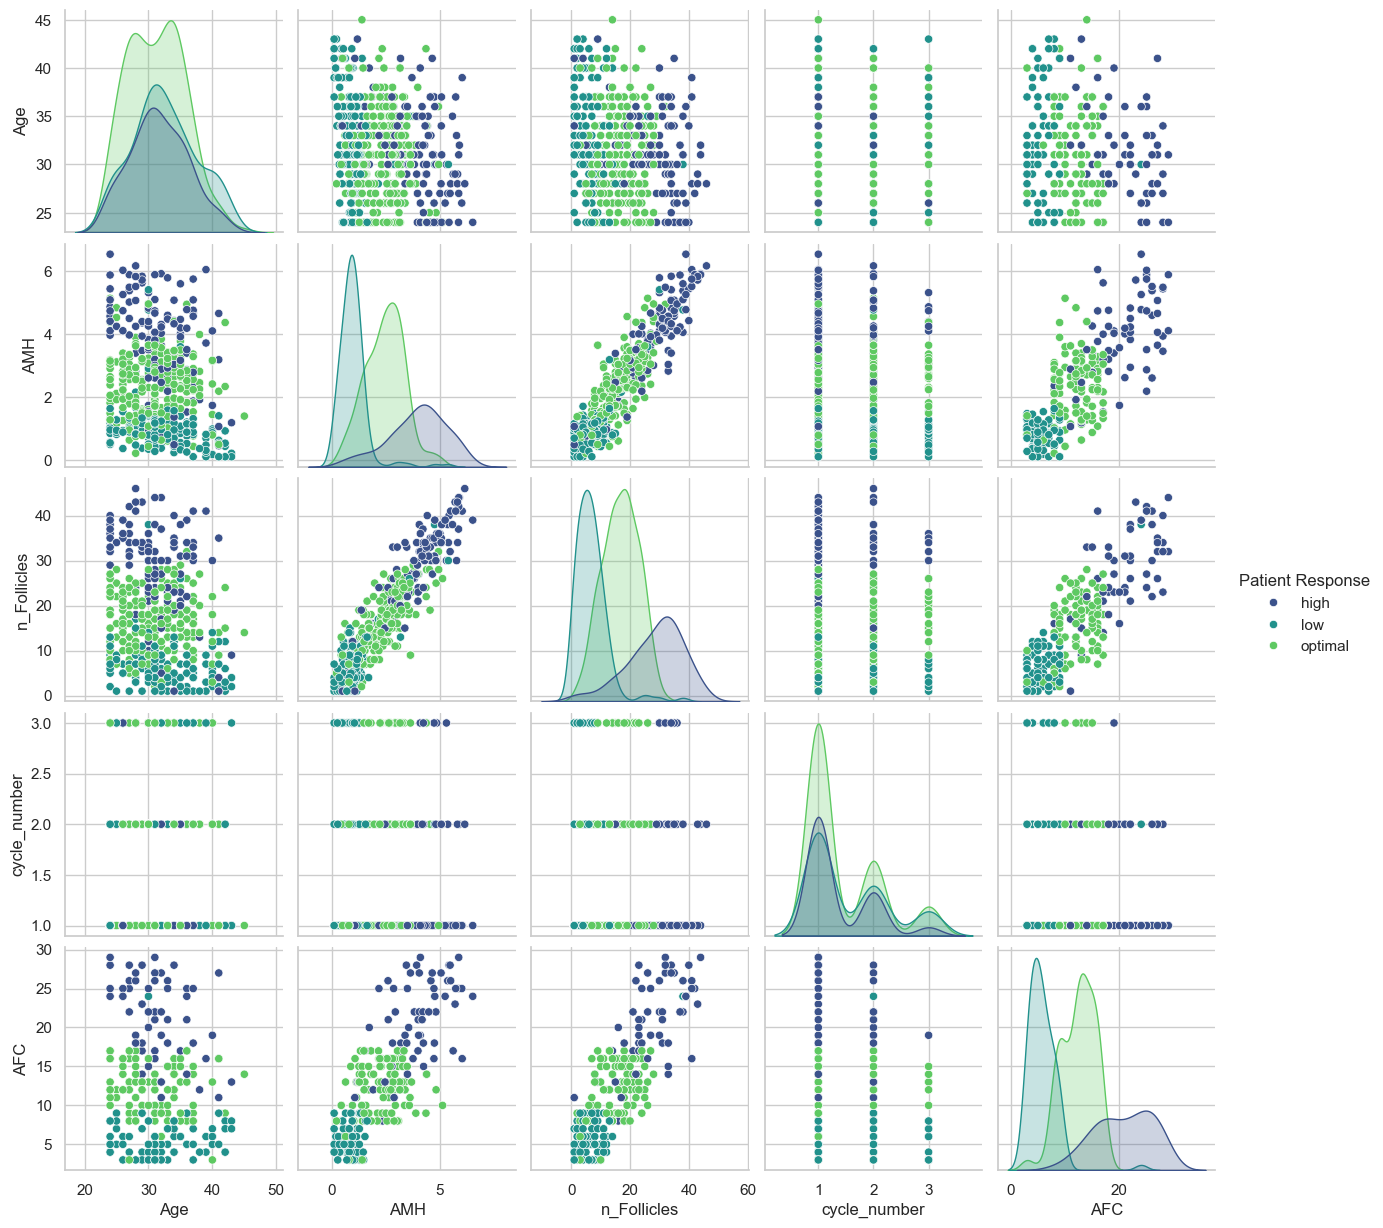

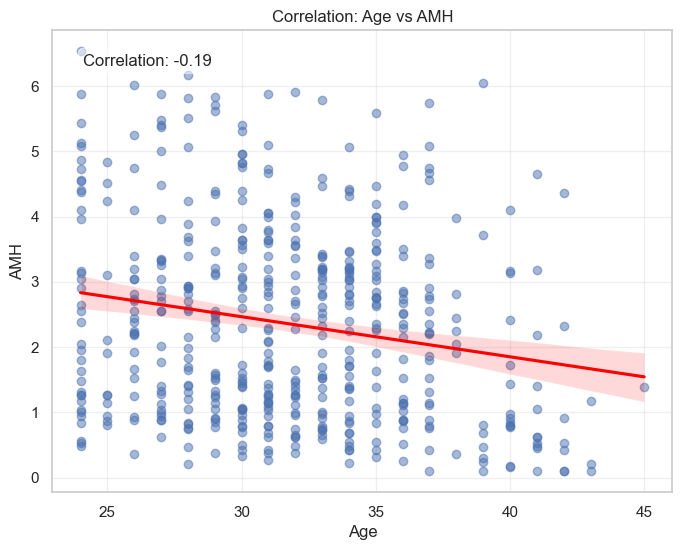

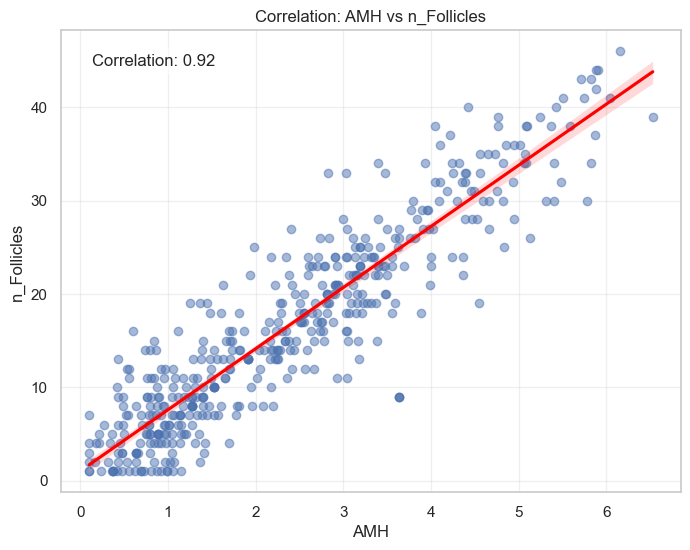

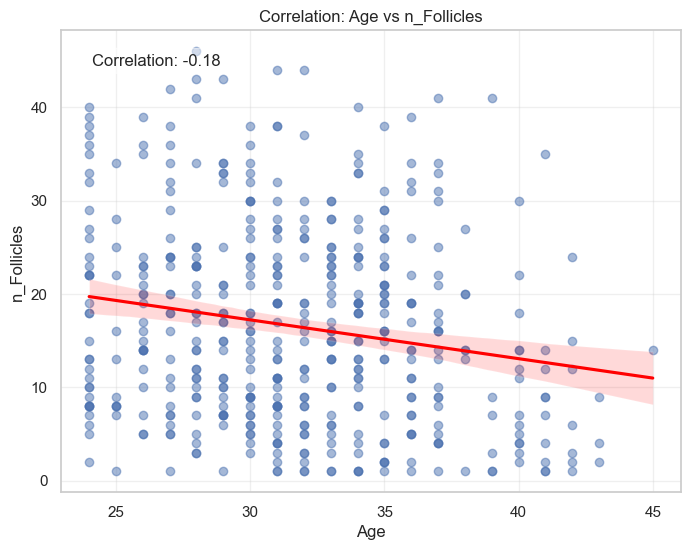


--- IMPUTATION LOGIC RESULTS ---
Correlation (r): 0.7822
Regression Line: AMH = (0.1746 * AFC) + 0.1309
Regression Line: AMH = (-0.0580 * Age) + 4.1008
Regression Line: n_Follicles = (nan * Age) + nan

Example for AFC = 10:
  - Using Correlation (Wrong): 7.8219
  - Using Regression (Correct): 1.8768


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
# Assuming you are running this from the project root
df = pd.read_csv("data/processed/clean_dataset_experience2.csv")

# 2. Impute Age with Median (As you mentioned you already did this)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Separate numerical columns for correlation analysis
# Note: We exclude 'patient_id' and 'Protocol' (categorical) for the heatmap
numerical_cols = ['Age', 'AMH', 'n_Follicles', 'E2', 'cycle_number', 'AFC']
# Ensure all exist in your dataframe (handle case sensitivity or missing columns)
numerical_cols = [c for c in numerical_cols if c in df.columns]

# --- PLOT 1: ALL TOGETHER (Correlation Heatmap) ---
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create Heatmap
# annot=True shows the numbers
# cmap='coolwarm' makes red=positive correlation, blue=negative
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Relationships Between Features")
plt.tight_layout()
plt.show()

# --- PLOT 2: ALL TOGETHER (Pairplot) ---
# This plots every numerical variable against every other one
# hue='Patient Response' colors the dots by the outcome (Low/Optimal/High)
print("Generating Pairplot... this may take a moment.")
sns.pairplot(df, vars=numerical_cols, hue='Patient Response', diag_kind='kde', palette='viridis')
plt.show()

# --- PLOT 3: "EACH 2" (Key Bivariate Relations) ---
# These are the most medically significant pairs to check for imputation logic

# Function to plot regression relationships
def plot_relation(x_col, y_col, df):
    if x_col not in df.columns or y_col not in df.columns:
        return
        
    plt.figure(figsize=(8, 6))
    # regplot draws a scatter plot AND a regression line (best fit)
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Correlation: {x_col} vs {y_col}")
    
    # Calculate correlation just for these two
    corr = df[[x_col, y_col]].corr().iloc[0, 1]
    plt.text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.grid(True, alpha=0.3)
    plt.show()

# A. Age vs AMH (Usually Inverse Relation)
# If correlation is high negative (e.g., -0.7), you can use Age to fill missing AMH.
plot_relation('Age', 'AMH', df)

# B. AMH vs Follicles (Usually Strong Positive)
# If correlation is high positive (e.g., 0.8), you can use AMH to fill missing Follicles (and vice versa).
plot_relation('AMH', 'n_Follicles', df)

# C. Follicles vs E2 (Estradiol)
# E2 is produced by follicles, so they should be correlated.
plot_relation('n_Follicles', 'E2', df)

# D. AFC vs AMH (If AFC exists in your data)
# AFC is very similar to AMH biologically. Check this to see if you can drop AFC if AMH is present.
plot_relation('Age', 'n_Follicles', df)

# --- SECTION 4: STATISTICAL IMPUTATION DEMO (Addressing your question) ---
# You asked: "Can I use AMH = AFC * 0.77?"
# Answer: No. You need the Regression Equation (y = mx + c), not just correlation.

# Let's calculate the REAL equation between AFC and AMH (if they exist)
if 'AFC' in df.columns and 'AMH' in df.columns:
    # 1. Get rows where both exist (to train the regression)
    clean_data = df.dropna(subset=['AFC', 'AMH'])

    if not clean_data.empty:
        x = clean_data['AFC']
        y = clean_data['AMH']
        z = clean_data['Age']
        w = clean_data['n_Follicles']
        # 2. Calculate Slope (m) and Intercept (c)
        # np.polyfit(x, y, 1) fits a 1st degree polynomial (line)
        slope, intercept = np.polyfit(x, y, 1)
        slope_age, intercept_age = np.polyfit(z, y, 1)
        
        slope_AF , intercept_AF = np.polyfit(z, w, 1)
        correlation = clean_data['AFC'].corr(clean_data['AMH'])

        print("\n--- IMPUTATION LOGIC RESULTS ---")
        print(f"Correlation (r): {correlation:.4f}")
        print(f"Regression Line: AMH = ({slope:.4f} * AFC) + {intercept:.4f}")
        print(f"Regression Line: AMH = ({slope_age:.4f} * Age) + {intercept_age:.4f}")
        print(f"Regression Line: n_Follicles = ({slope_AF:.4f} * Age) + {intercept_AF:.4f}")

        # 3. Demonstrate the difference
        example_afc = 10
        wrong_imputation = example_afc * correlation
        correct_imputation = (slope * example_afc) + intercept
        
        print(f"\nExample for AFC = {example_afc}:")
        print(f"  - Using Correlation (Wrong): {wrong_imputation:.4f}")
        print(f"  - Using Regression (Correct): {correct_imputation:.4f}")
    else:
        print("\nNot enough data to calculate regression between AFC and AMH.")

In [57]:
main_df[main_df['n_Follicles'].isna()]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,Age_group
8,258,1,29.0,Flexible Antagonist,5.62,NaN,689.82,17.0,high,25-34
24,2524,1,30.0,Flexible Antagonist,1.06,NaN,64.47,5.0,low,25-34
30,2530,1,36.0,Fixed Antagonist,2.86,NaN,1246.56,25.0,high,35-40
38,2538,1,27.0,Flexible Antagonist,1.13,NaN,4992.00,13.0,optimal,25-34
56,2556,1,32.0,Flexible Antagonist,2.71,NaN,277.88,NaN,optimal,25-34
61,2561,1,34.0,Flexible Antagonist,1.38,NaN,2576.00,NaN,optimal,25-34
70,2570,1,34.0,Flexible Antagonist,3.07,NaN,735.51,NaN,optimal,25-34
71,2571,1,32.0,Fixed Antagonist,0.66,NaN,3730.00,4.0,low,25-34
76,2576,1,34.0,Flexible Antagonist,0.23,NaN,383.58,NaN,low,25-34
79,2579,1,33.0,Flexible Antagonist,0.73,NaN,4517.00,NaN,low,25-34


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Load Data
try:
    df = pd.read_csv("data/processed/clean_dataset_experience2.csv")
except FileNotFoundError:
    df = pd.read_csv("final_dataset.csv") # Fallback for local testing

# 2. Impute Age (Standard Step - needed before using Age as a predictor)
df['Age'] = df['Age'].fillna(df['Age'].median())

# --- FUNCTION: Predict Missing AMH from Age ---
def impute_amh_from_age(dataframe):
    """
    Trains a Linear Regression model (Age -> AMH) and imputes missing AMH values.
    Returns the updated dataframe and model metrics.
    """
    print("\n--- Training Linear Regression: Age vs AMH ---")
    
    # Filter data: We need rows where BOTH Age and AMH exist to train
    train_data = dataframe.dropna(subset=['Age', 'AMH'])
    
    if train_data.empty:
        print("Error: Not enough data to train Age -> AMH model.")
        return dataframe, None
        
    # Prepare X (Age) and y (AMH)
    X_train = train_data['Age'].values.reshape(-1, 1)
    y_train = train_data['AFC'].values
    
    # Train Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Calculate Metrics
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y_train, model.predict(X_train))
    
    print(f"Model Trained: AMH = ({slope:.4f} * Age) + {intercept:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Predict and Fill Missing Values
    missing_mask = dataframe['AMH'].isna()
    if missing_mask.sum() > 0:
        print(f"Imputing {missing_mask.sum()} missing AMH values...")
        X_missing = dataframe.loc[missing_mask, 'Age'].values.reshape(-1, 1)
        predicted_amh = model.predict(X_missing)
        
        # Enforce non-negative AMH (biological constraint)
        predicted_amh = np.maximum(predicted_amh, 0)
        
        dataframe.loc[missing_mask, 'AMH'] = predicted_amh
    else:
        print("No missing AMH values found to impute.")
        
    # Visualization of the Relationship
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=train_data['Age'], y=train_data['AMH'], 
                    color='green', alpha=0.5, label='Actual Data')
    
    # Plot Regression Line
    X_range = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    plt.plot(X_range, y_range, color='darkgreen', linewidth=2, label=f'Fit (R²={r2:.2f})')
    
    plt.title('Linear Regression: Predicting AMH from Age')
    plt.xlabel('Age')
    plt.ylabel('AMH')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return dataframe, model

# --- EXECUTE THE NEW FUNCTION ---
df, amh_age_model = impute_amh_from_age(df)


# --- LINEAR REGRESSION MODEL: AMH -> n_Follicles ---
# (Existing logic runs AFTER imputing AMH, so we have more data points now)

print("\n--- Training Linear Regression: AMH vs n_Follicles ---")

# Step A: Filter Data
clean_data = df.dropna(subset=['AMH', 'n_Follicles'])

if not clean_data.empty:
    # Step B: Prepare X (Feature) and y (Target)
    X = clean_data['AMH'].values.reshape(-1, 1)
    y = clean_data['n_Follicles'].values

    # Step C: Initialize and Train the Model
    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Step D: Get Coefficients
    slope = reg_model.coef_[0]
    intercept = reg_model.intercept_
    
    # Step E: Calculate R-squared (Accuracy of the fit)
    y_pred = reg_model.predict(X)
    r2 = r2_score(y, y_pred)

    print(f"Model Trained Successfully!")
    print(f"Slope (m): {slope:.4f}")
    print(f"Intercept (c): {intercept:.4f}")
    print(f"R² Score: {r2:.4f} (1.0 is perfect, 0.0 is random)")
    print(f"\nFinal Equation: n_Follicles = ({slope:.4f} * AMH) + {intercept:.4f}")

    # Step F: Visualization
    plt.figure(figsize=(10, 6))
    
    # 1. Scatter plot of actual data
    sns.scatterplot(x=clean_data['AMH'], y=clean_data['n_Follicles'], 
                    color='blue', alpha=0.6, label='Actual Patient Data')
    
    # 2. Plot the regression line
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range_pred = reg_model.predict(X_range)
    
    plt.plot(X_range, y_range_pred, color='red', linewidth=2, 
             label=f'Regression Line (R²={r2:.2f})')
    
    plt.title('Linear Regression: Predicting Follicles from AMH')
    plt.xlabel('AMH (Anti-Müllerian Hormone)')
    plt.ylabel('n_Follicles (Number of Follicles)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Error: Not enough data to train the model (Columns empty or missing).")


--- Training Linear Regression: Age vs AMH ---


ValueError: Input y contains NaN.

In [88]:
import pandas as pd
main_df = pd.read_csv("data/processed/clean_dataset_experience2.csv")

In [89]:
main_df.isna().sum()

patient_id          0
cycle_number        0
Age                 0
Protocol            0
AMH                 0
n_Follicles         0
E2_day5             0
AFC                 0
Patient Response    0
dtype: int64

In [69]:
# Example mapping: you need to compute these from your dataset
n_follicules_mapping = {
    'Low': 10,      # median n_Follicules in Low group
    'Medium': 20,   # median n_Follicules in Medium group
    'High': 30      # median n_Follicules in High group
}

def assign_n_follicules(row):
    age = row['Age']
    if age <= 34:  # adjust ranges based on your boxplot
        group = 'Low'
    elif 35 <= age <= 39:
        group = 'Medium'
    else:
        group = 'High'
    return n_follicules_mapping[group]

df['n_Follicules'] = df.apply(assign_n_follicules, axis=1)


In [73]:
main_df['n_Follicles'] = main_df.apply(assign_n_follicules, axis=1)

main_df[main_df['n_Follicles'].isna()   ]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,n_Follicules


In [76]:
main_df['n_Follicles']

0      20
1      10
2      10
3      10
4      10
       ..
498    10
499    10
500    10
501    10
502    10
Name: n_Follicles, Length: 503, dtype: int64

In [85]:
main_df.groupby('n_Follicles')['E2_day5'].mean()


n_Follicles
10    1253.740499
20    1007.287340
30    1487.576765
Name: E2_day5, dtype: float64

C:\Users\maata\AppData\Local\Temp\ipykernel_21252\340375648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='n_Follicles', y='E2_day5', data=main_df, inner='quartile', palette='Greens')


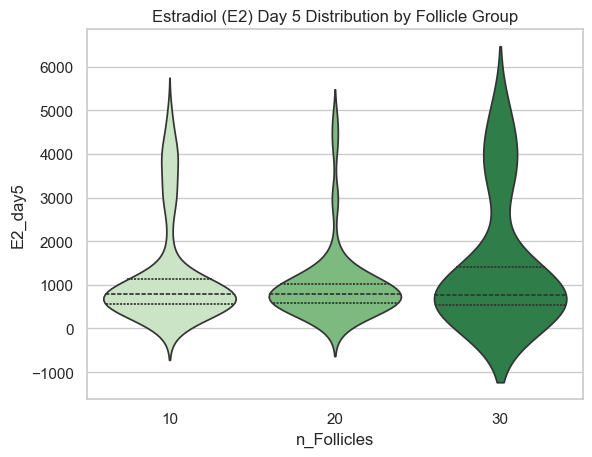

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='n_Follicles', y='E2_day5', data=main_df, inner='quartile', palette='Greens')
plt.title('Estradiol (E2) Day 5 Distribution by Follicle Group')
plt.show()


In [87]:
main_df['n_Follicles'].unique()

array([20, 10, 30])

C:\Users\maata\AppData\Local\Temp\ipykernel_21252\4272706462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_df, x='Patient Response', palette='viridis')


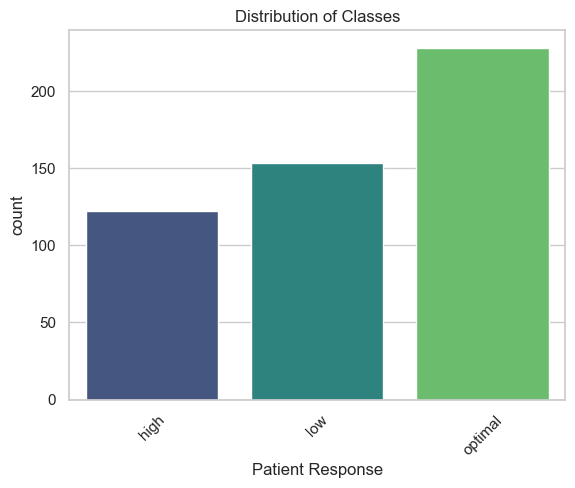

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=main_df, x='Patient Response', palette='viridis')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)
plt.show()
